In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [9]:
# Directory of the dataset 
filename = 'googl.us.txt'

# Read the file
Prgoo = pd.read_csv(filename,sep=',',index_col='Date')

# Prices is the predict value and initial the independet variable (y)
#prices = Prgoo['Close']
#initial = (Prgoo['Open'])

prices = Prgoo.iloc[0:1000,3].to_numpy()
initial = Prgoo.iloc[0:1000,0].to_numpy()

lab_enc = preprocessing.LabelEncoder()
prices = lab_enc.fit_transform(prices)
initial=initial.reshape(-1, 1)
 
#Convert to 1d Vector
#prices = np.reshape(prices, (len(prices), 1))
#initial = np.reshape(initial, (len(initial), 1))



In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = svm.SVC(kernel='linear')

regressor.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Train-set / R2 score: 0.9958414612991862


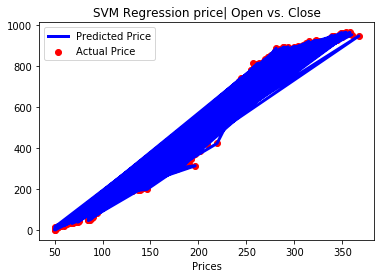

In [11]:
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('SVM Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

Test-set/ R2 score: 0.9898283707236241


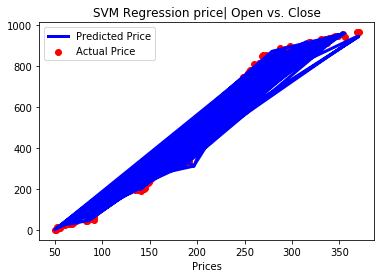

In [12]:
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('SVM Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

print('Train-set /','MSE score:',mean_squared_error(ytrain,regressor.predict(xtrain)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytrain,regressor.predict(xtrain))))

Train-set / MSE score: 329.6850746268657
Train-set / RMSE score: 18.157232019965644


In [14]:
print('Train-set /','MSE score:',mean_squared_error(ytest,regressor.predict(xtest)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytest,regressor.predict(xtest))))

Train-set / MSE score: 748.6030303030303
Train-set / RMSE score: 27.360610927079648


In [16]:
print(regressor.predict(xtrain))

[781 397 811 580   2 434 765 495 745 437 495 349 168 158 306 473 695 578
 131 886 174 271 532  69 250 129 309 500 484 109 507 705 109 397 125  29
 803 191 397 907 163 772 109 170  12 722 458 109 657 926 242 109 903 243
 242 834 326 109 713 814 181  43 666  85 666  59 397 329 745 580  26 442
 512 442 666 666 824 513 152 397 397 560 865 217 906 745 657 962 397 397
  18 792 447 724 457 416 109 109 537 272 277 539 591 397 286  15 177 372
 722 715 246 737 804 591 495 666 657 172 591 664 666 736 290 134 226 551
 591 657 300 450 109 151 657 869 308 162 128 452 484 397 379 144 873 129
 514 666 584 895 745 568 666 161   0 292 442  38  42 442 124 397 801 580
 741 139 484 179 397 429 745 732 580 175 301 591 911 846 580 397 860 746
 205 489 484  10 447 757 241 176 765  21 542 580 887 517 410 607 964 215
 657 132 657  61 580 278 960 432 109 109 847 397 185 262 247 397 164 840
 397 945 564 155 166 495 657  49 874 631 397 274 109 595 192 666 953 745
 223 345 659 362 515 832 109 148 886 122 657 827 10